In [12]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn.cluster import KMeans
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pandas as pd
import numpy as np
import ast
import random
import math 
import time

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.base import TransformerMixin
from sklearn.metrics import roc_auc_score
        
df = pd.read_csv('bank-full.csv', encoding='latin-1')

df.dropna(inplace= True)
    
print ("df Shape: ", df.shape)
df = pd.get_dummies(df)
print ("df Shape: ", df.shape)
labels = np.array(df['goal'])
df= df.drop('goal', axis = 1)
df_list = list(df.columns)
df = np.array(df)
train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.2, random_state = 42)

print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)



df Shape:  (45211, 17)
df Shape:  (45211, 52)
Train_x Shape:  (36168, 51)
Train_y Shape:  (36168,)
Test_x Shape:  (9043, 51)
Test_y Shape:  (9043,)


[[7750  202]
 [ 709  382]]
AUC Score: 0.66236753702785
AUC Score prob: 0.9049023748356315


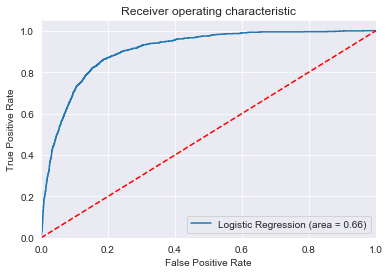

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(train_x, train_y)

y_pred=logreg.predict(test_x)
y_pred_prob = logreg.predict_proba(test_x)[:,1]

confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)

print ("AUC Score:", roc_auc_score(test_y, y_pred))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
import lightgbm as lgb


lgb_train = lgb.Dataset(train_x, train_y)
lgb_eval = lgb.Dataset(test_x, test_y)

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

gbm = lgb.train(parameters,
                       lgb_train,
                       valid_sets=lgb_train,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)
#
print (y_pred)

predictions= np.zeros(test_x.shape[0], dtype=np.int32)

#convert into binary values
for i in range(test_x.shape[0]):
    if y_pred[i]>=.5:       # setting threshold to .5
        predictions[i] =1
    else:  
        predictions[i] = 0




In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predictions)
print(cm)
print ("AUC Score:",roc_auc_score(test_y, predictions))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred))